https://ppluscht.github.io/DSFinal/

## The Effect of Covid 19 on the Restaurant Industry in New Orleans

Paul Pluscht and Daniel Margulies

## Research Ideas and Plan



For our data science project we plan to focus on the effects of COVID-19 on the restaurant/bar industry in New Orleans. 
We are interested in exploring this as an opportunity to learn what factors make a restaurant more or less 
likely to close during the pandemic. We know New Orleans has been hit hard by the pandemic, especially as a 
city that is very reliant on tourism. We believe our data could provide insight for existing restaurants and those 
looking to open new restaurants. We hope to learn what impact location, proximity to other restaurants, being part of a chain, and other factors contribute to the resiliency and prosperity of a restaurant. 

The first dataset we will be exploring to answer that question is the business liscence data
for New Orleans found [here](https://data.nola.gov/Economy-and-Workforce/Occupational-Business-Licenses/hjcd-grvu). We are interested in this dataset because it contains over 10.8K businesses in New Orleans. This will be useful for us in a multitude of ways. We can filter the data to only show restaurants and use those to see what new places are opening up (we can see business start date), as well as see information such as address, business type, etc. We will also use New Orleans yellow pages to help us determine what businesses have opened and closed.

That data combined with other datasets from data.nola.gov can help us answer another question: During the pandemic, live event venues and near short term rental sales were halted or severely slowed. Were restaurants closer to those areas hit harder?

For example, restaurants that are positioned near bars and are reliant on people in the area drinking should theoretically be hit harder than those that rely on families coming to eat. We can use the addresses in our data along with geopandas to see if that hypothesis holds. 

Another similar question we have is if bars and restaurants that were near other bars and restaurants were any more or less likely to close?

The dataset for short-term rentals is found [here](https://data.nola.gov/Housing-Land-Use-and-Blight/Vacation-Rentals-Hotels-B-B-short-term-rentals-etc/rbhq-zbz9)
We think this dataset can also provide some insight as we can see what areas short-term rentals/hotels are highly concentrated in. With those markets drying up, nearby restaurants will not be experiencing the business they once did and could be in big trouble. This data may be able to give insight on the potential risks/rewards of opening a restaurant near a tourist spot vs. a neighborhood.

The dataset is for live event permits is found [here](https://data.nola.gov/Economy-and-Workforce/Live-Entertainment-Permits/fi6r-tech).
Like short-term rentals, live events drive large amounts of people to certain areas. Restaurants near the saints stadium for example most likely see boosts in customers on game-day. Are they able to survive without those customer surges just as well as other restaurants? 

We suppose both locals restaurants and local bars have seen similar patterns in revenue loss as a result of the pandemic, potentially far more so than corporate staples such as a Mcdonalds, Domino’s or Raising Cane’s for example. That is why we will also examine how national chain restaurants did in comparison to local restaurants and local chains.

While the total shrinkage of the NOLA restaurants is an interesting and important question, we simply do not have the data to answer this question. Unfortunately, we can only generate a sample of open and closed restaurants, not describe the total NOLA restaurant economy. As a result, it is important to consider that all closure rates only have relative value (i.e. local restaurants closing at twice the rate of chain restaurants is a potential number we can calculate, not closure rate of chains in NOLA).

## Collaboration Plan

We exchange text messages frequently and will zoom at least bi-weekly to coordinate/delegate tasks and discuss 
further progress. We set up a private github repository for code collaboration and plan on using that to do our work.


## Data Collection

In [1]:
import pandas as pd
import re
import numpy as np
!pip3 install fuzzywuzzy
!pip3 install python-Levenshtein
import fuzzywuzzy
import datetime
import matplotlib.pyplot as plt

pd.options.display.max_rows = 30

pd.set_option('display.max_columns', 500)

The code below creates a dataframe from the Occupational Business License Data found [here](https://data.nola.gov/Economy-and-Workforce/Occupational-Business-Licenses/hjcd-grvu) 

In [2]:
active_licenses = pd.read_csv("./Data/licenses.csv", header = None)
active_licenses.columns = active_licenses.loc[0].values.tolist() #Renames the columns
active_licenses.drop(index = 0, inplace = True) #Drops a row containing only title info
active_licenses.head()


,BusinessName,OwnerName,BusinessType,BusinessLicenseNumber,BusinessStartDate,Address,StreetNumber,StreetDirection,StreetName,StreetSuffix,Suite,City,State,Zip,PhoneNumber,MailAddress,MailSuite,MailCity,MailState,MailZip,Latitude,Longitude,Location
1,KINDRED INVESTIGATIONS,KINDRED INVESTIGATIONS INC.,1212 - HOME BASED-OFFICE USE ONLY,242228,02/19/2020,1334 ST ROCH AVE,1334,NaN,ST ROCH,AVE,NaN,NEW ORLEANS,LA,70117,NaN,1334 ST ROCH AVE,NaN,NEW ORLEANS,LA,70117,29.971651206495,-90.0525862225698,"(29.971651206495, -90.0525862225698)"
2,LEGIER & COMPANY APAC,LEGIER & MATERNE APAC,3344 - CERTIFIED PUBLIC ACCOUNTANTS,245139,01/01/1997,1100 POYDRAS ST,1100,NaN,POYDRAS,ST,3450,NEW ORLEANS,LA,70163,5045998388,1100 POYDRAS ST,3450,NEW ORLEANS,LA,70163,29.9499303373249,-90.075483218956,"(29.9499303373249, -90.075483218956)"
3,ASMINISTRATION OFFICE/NEW ORLEANS MISSION,"NEW ORLEANS MISSION, INC","2044 - COMMUNITY HOUSING SVCS, OTH",245161,01/01/2010,1134 BARONNE ST,1134,NaN,BARONNE,ST,NaN,NEW ORLEANS,LA,70113,5045232116,1134 BARONNE ST,NaN,NEW ORLEANS,LA,70113,29.9428477199858,-90.0760425545731,"(29.9428477199858, -90.0760425545731)"
4,TOTAL COMMUNITY ACTION INC,TOTAL COMMUNITY ACTION INC,"1401 - SOCIAL ADVOCACY ORGANIZATIONS, OTHER",242233,07/17/2015,1420 S JEFFERSON DAVIS PKWY,1420,S,JEFFERSON DAVIS,PKWY,NaN,NEW ORLEANS,LA,70125,5043303070,1420 S JEFFERSON DAVIS PKWY,NaN,NEW ORLEANS,LA,70125,29.9559760388089,-90.1050238200641,"(29.9559760388089, -90.1050238200641)"
5,MOBILE MINI INC,MOBILE MINI INC,3330 - CONSTR/MNG/FRSTRY MACH & EQP RNT/LSNG,242318,05/01/1999,9641 GENTILLY RD,9641,NaN,GENTILLY,RD,101,NEW ORLEANS,LA,70127,6028946311,4646 E VAN BUREN ST,STE 400,PHOENIX,AZ,85008,NaN,NaN,NaN


Since we are only interested in restaurants and bars, we need to filter by the following categories: full service restaurants (1105 - FULL SVC RESTAURANTS (TABLE SERVICE)), partial sevice restaurants((2062- LIMITED SVC RESTAURANTS (NO TABLE SERVICE)), and bars (1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)).

In [3]:
active_FS = active_licenses.copy().loc[active_licenses.BusinessType.isin(["1105 - FULL SVC RESTAURANTS (TABLE SERVICE)",
                                                                 "2062- LIMITED SVC RESTAURANTS (NO TABLE SERVICE)",
                                                                 "1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)"])]

active_FS.head()

,BusinessName,OwnerName,BusinessType,BusinessLicenseNumber,BusinessStartDate,Address,StreetNumber,StreetDirection,StreetName,StreetSuffix,Suite,City,State,Zip,PhoneNumber,MailAddress,MailSuite,MailCity,MailState,MailZip,Latitude,Longitude,Location
13,"TASTY TREAT, LLC","TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),233384,09/29/2016,1900 NORTH CLAIBORNE AVENUE,1900,NORTH,CLAIBORNE,AVENUE,NaN,NEW ORLEANS,LA,70116,NaN,1900 NORTH CLAIBORNE AVENUE,NaN,NEW ORLEANS,LA,70116,NaN,NaN,NaN
17,MERMAIDS,MERMAIDS LLC,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),244798,01/08/2019,8700 LAKE FOREST BLVD,8700,NaN,LAKE FOREST,BLVD,NaN,NEW ORLEANS,LA,70127,5042355513,531823 P.O. BOX,NaN,NEW ORLEANS,LA,70153,30.0277705105953,-89.9885260904688,"(30.0277705105953, -89.9885260904688)"
34,AUDUBON ZOO,"AUDUBON NATURE INSTITUTE, INC",1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),232009,10/01/1977,6500 MAGAZINE ST,6500,NaN,MAGAZINE,ST,NaN,NEW ORLEANS,LA,70118,5048612537,6500 MAGAZINE ST,NaN,NEW ORLEANS,LA,70118,29.9247123907783,-90.1281704516248,"(29.9247123907783, -90.1281704516248)"
37,JAKEL'S BACK STREET LOUNGE,JAKEL'S BACK STREET LOUNGE INC,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),245136,06/21/2006,2613-15 JASMINE ST,2613-15,NaN,JASMINE,ST,NaN,NEW ORLEANS,LA,70127,NaN,11001 GUILDFORD RD,NaN,NEW ORLEANS,LA,70122,NaN,NaN,NaN
48,CLAIRE'S POUR HOUSE,NOEL REAL ESTATE LLC,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),245186,04/25/2011,233 DECATUR ST,233,NaN,DECATUR,ST,NaN,NEW ORLEANS,LA,70130,5045588980,233 DECATUR ST,NaN,NEW ORLEANS,LA,70130,29.9535033912752,-90.0660110008797,"(29.9535033912752, -90.0660110008797)"


Also, this dataframe contains information that will likely not be used. To clean it up, 
we will drop several of the columns in the dataset. Also, we will change the index to the business name and fill all NaN values to zeroes.

In [4]:
active_FS.drop(["OwnerName","BusinessLicenseNumber",'StreetNumber', 'StreetDirection',
                          'StreetName', 'StreetSuffix', 'Suite', 'City', 'State','MailAddress',
                          'MailSuite', 'MailCity', 'MailState','MailZip'], 
                          axis = 1, inplace = True)
active_FS = active_FS.fillna(0) #fills nans with zeroes
active_FS.reset_index(inplace=True)
active_FS.head()

,index,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Latitude,Longitude,Location
0,13,"TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),09/29/2016,1900 NORTH CLAIBORNE AVENUE,70116,0,0,0,0
1,17,MERMAIDS,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),01/08/2019,8700 LAKE FOREST BLVD,70127,5042355513,30.0277705105953,-89.9885260904688,"(30.0277705105953, -89.9885260904688)"
2,34,AUDUBON ZOO,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),10/01/1977,6500 MAGAZINE ST,70118,5048612537,29.9247123907783,-90.1281704516248,"(29.9247123907783, -90.1281704516248)"
3,37,JAKEL'S BACK STREET LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),06/21/2006,2613-15 JASMINE ST,70127,0,0,0,0
4,48,CLAIRE'S POUR HOUSE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),04/25/2011,233 DECATUR ST,70130,5045588980,29.9535033912752,-90.0660110008797,"(29.9535033912752, -90.0660110008797)"


## Data Processing

In the following cell, we read the txt files from yellowpages into a their own respective lists. 

In [5]:
#The following lines open and read in yellow pages data
B2018f = open("./Data/Clean_yellow/B2018.txt", "r")
B2018 = B2018f.read()
B2019f = open("./Data/Clean_yellow/B2019.txt", "r")
B2019 = B2019f.read()
R2018f = open("./Data/Clean_yellow/R2018.txt", "r")
R2018 = R2018f.read()
R2019f = open("./Data/Clean_yellow/R2019.txt", "r")
R2019 = R2019f.read()

#Split the strings into lists of rows
B2018 = B2018.split("\n")
B2019 = B2019.split("\n")
R2018 = R2018.split("\n")
R2019 = R2019.split("\n")

#The following section adds a space between the dash and the numbers
reg_num = r'\-\d{3}\-'  #regex for matching the dash and first 3 digits

for i in range(len(R2019)): #iterates through list of rows
   if re.search(reg_num, R2019[i]) != None: #enter if there is a match
      a = " " + re.search(reg_num, R2019[i])[0][1:] #adds a space
      R2019[i] = re.sub(reg_num, a, R2019[i]) #replaces the match with the string with a space

for i in range(len(R2018)):
   if re.search(reg_num, R2018[i]) != None:
      a = " " + re.search(reg_num, R2018[i])[0][1:]
      R2018[i] = re.sub(reg_num, a, R2018[i])

for i in range(len(B2019)):
   if re.search(reg_num, B2019[i]) != None:
      a = " " + re.search(reg_num, B2019[i])[0][1:]
      B2019[i] = re.sub(reg_num, a, B2019[i])

for i in range(len(B2018)):
   if re.search(reg_num, B2018[i]) != None:
      a = " " + re.search(reg_num, B2018[i])[0][1:]
      B2018[i] = re.sub(reg_num, a, B2018[i])

#This next block reads every line into their respective lists

reg_name = r'\ \d{3,4}' #regex to match the address number
reg_dash = r'\-{2,}' #regex to match dashes that separate the address and phone number

masterR2019 = [] #blank list where the entries will be added

for i in range(len(R2019)): #iterates through the list of rows
   entry = [0,0,0]
   entry[0] = R2019[i][-8:] #stores the phone number
   try:
       add_num = re.search(reg_name, R2019[i])[0][1:] # gets the address number
       b = len(re.search(reg_dash, R2019[i])[0]) # gets the number of separating dashes
       a = re.split(reg_name, R2019[i]) # splits on the address number
       entry[1] = a[0] # adds the name of the restaurant to the entry 
       entry[2] = str(add_num) + a[1][:-(b+1)] # adds the address
   except:
       print(R2019[i]) # prints the row if there is an error
       print(i) # prints the row in the car
   masterR2019.append(entry) #adds the row

masterR2018 = []

for i in range(len(R2018)): #repeats the above for a different list
   entry = [0,0,0]
   entry[0] = R2018[i][-8:]
   try:
       add_num = re.search(reg_name, R2018[i])[0][1:]
       b = len(re.search(reg_dash, R2018[i])[0])
       a = re.split(reg_name, R2018[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(R2018[i])
       print(i)
   masterR2018.append(entry)


masterB2018 = []

for i in range(len(B2018)): #repeats the above for a different list
   entry = [0,0,0]
   entry[0] = B2018[i][-8:]
   try:
       add_num = re.search(reg_name, B2018[i])[0][1:]
       b = len(re.search(reg_dash, B2018[i])[0])
       a = re.split(reg_name, B2018[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(B2018[i])
       print(i)
   masterB2018.append(entry)

masterB2019 = []

for i in range(len(B2019)): #repeats the above for a different list
   entry = [0,0,0] 
   entry[0] = B2019[i][-8:]
   try:
       add_num = re.search(reg_name, B2019[i])[0][1:]
       b = len(re.search(reg_dash, B2019[i])[0])
       a = re.split(reg_name, B2019[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(B2019[i])
       print(i)
   masterB2019.append(entry)


The following block creates dataframes from the split lists created earlier.

In [6]:
R19_df = pd.DataFrame(masterR2019, columns = ["PhoneNumber", "name", "address"]) # reads the lists into a df
R18_df = pd.DataFrame(masterR2018, columns = ["PhoneNumber", "name", "address"])
B19_df = pd.DataFrame(masterB2019, columns = ["PhoneNumber", "name", "address"])
B18_df = pd.DataFrame(masterB2018, columns = ["PhoneNumber", "name", "address"])
active_FS["PhoneNumber"] = active_FS["PhoneNumber"].apply(lambda x : str(x)[3:6] + "-" + str(x)[6:] if x != 0 else x) #removes the area code from the number
display(R19_df)
active_FS

,PhoneNumber,name,address
0,733-3000,Augies Restaurant,6005 Jefferson Hwy New Orleans
1,899-5129,August Moon Restaurant,3635 Prytania St New Orleans
2,598-5300,Auntie Anne’s,500 Port Of New Orleans Pl New Orleans
3,592-7870,Avenue,1416 S Claiborne Ave New Orleans
4,821-4110,Avery’s Po Boys LLC,2510 Tulane Av New Orleans
...,...,...,...
1035,533-9430,The Superb Pearl,1400 Frenchmen St New Orleans
1036,301-2083,The Velvet Cactus,6300 Argonne Blvd New Orleans
1037,522-7261,The Court of Two Sisters,613 Royal St New Orleans
1038,835-5021,The Harbor Deli,3024 17th St Metairie


,index,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Latitude,Longitude,Location
0,13,"TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),09/29/2016,1900 NORTH CLAIBORNE AVENUE,70116,0,0,0,0
1,17,MERMAIDS,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),01/08/2019,8700 LAKE FOREST BLVD,70127,235-5513,30.0277705105953,-89.9885260904688,"(30.0277705105953, -89.9885260904688)"
2,34,AUDUBON ZOO,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),10/01/1977,6500 MAGAZINE ST,70118,861-2537,29.9247123907783,-90.1281704516248,"(29.9247123907783, -90.1281704516248)"
3,37,JAKEL'S BACK STREET LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),06/21/2006,2613-15 JASMINE ST,70127,0,0,0,0
4,48,CLAIRE'S POUR HOUSE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),04/25/2011,233 DECATUR ST,70130,558-8980,29.9535033912752,-90.0660110008797,"(29.9535033912752, -90.0660110008797)"
...,...,...,...,...,...,...,...,...,...,...
1160,10840,"CARONDELET 845, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),05/09/2019,845 CARONDELET ST,70130,0,29.9452498984044,-90.0733439227211,"(29.9452498984044, -90.0733439227211)"
1161,10846,CARMO,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),04/14/2010,527 JULIA ST,70130,875-4132,29.9456135078571,-90.0698332314993,"(29.9456135078571, -90.0698332314993)"
1162,10866,THE SHOWCASE BAR LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),02/12/2009,1915 N BROAD ST,70119,940-5022,29.9841090573274,-90.0714776048371,"(29.9841090573274, -90.0714776048371)"
1163,10879,ORANGE COUCH CAFE,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),08/20/2012,2339 ROYAL ST,70117,267-7327,29.9648117230473,-90.0541814678062,"(29.9648117230473, -90.0541814678062)"


In [56]:
YP19_B_and_R = R19_df.append(B19_df) # adds the bars data to the restaurant dataframe
YP18_B_and_R = R18_df.append(B18_df)
display(YP19_B_and_R)

,PhoneNumber,name,address
0,733-3000,Augies Restaurant,6005 Jefferson Hwy New Orleans
1,899-5129,August Moon Restaurant,3635 Prytania St New Orleans
2,598-5300,Auntie Anne’s,500 Port Of New Orleans Pl New Orleans
3,592-7870,Avenue,1416 S Claiborne Ave New Orleans
4,821-4110,Avery’s Po Boys LLC,2510 Tulane Av New Orleans
...,...,...,...
170,586-9220,Voodoo Two,330 Carondelet St New Orleans
171,277-0732,Wherehouse Bar And Grill,1351 E St Bernard Hwy Chalmette
172,265-0081,Whiskey Bar,5032 W Esplanade Av Metairie
173,831-8705,Winston’s Pub and Patio,531 Metairie Rd Metairie


Here we process our data for short term rentals and live event venue locations. 

In [51]:
#Reads in our event and rental data
event = pd.read_csv("./Data/live_event.csv")
rental = pd.read_csv("./Data/rentals.csv")
#Drop unneeded columns
event = event.drop(["BusinessName","PermitType", "OwnerName", "Suite"], axis = 1)
rental = rental.drop(["Name", "Type", "Bedroom limit", "Guest limit", "Expiration date", "x", "y"], axis =1)

#This next chunk simply removes all points that do not have an accurate location 
r = r'\(\d{2}\.'
event["Location"] = event["Location"].fillna(0)
rental["Location"] = rental["Location"].fillna(0)
for i in range(rental.shape[0]):
   try: 
      if re.search(r, str(rental["Location"][i])) == None or rental["Location"][i] == 0:
         rental = rental.drop(i, axis = 0)
   except:
         rental = rental.drop(i, axis = 0)

for i in range(event.shape[0]):
   try: 
      if re.search(r, str(event["Location"][i])) == None or event["Location"][i] == 0:
         event = event.drop(i, axis = 0)
   except:
         rental = rental.drop(i, axis = 0)

#Once the wrong points are removed, we reset the index and make the location into a tuple
event.reset_index(inplace = True)
rental.reset_index(inplace = True)
event["Location"] = event["Location"].apply(lambda x:tuple(map(float, x[1:-1].split(', '))) )
rental["Location"] = rental["Location"].apply(lambda x:tuple(map(float, x[1:-1].split(', '))) )
display(event.head())
rental.head()

,index,Address,City,State,Zip,Location
0,0,3940 TULANE AVE,NEW ORLEANS,LA,70119,"(29.9677545841039, -90.1043808412406)"
1,1,727 BOURBON ST,NEW ORLEANS,LA,70116,"(29.9592339370518, -90.0652029495608)"
2,2,1623 ST ANN ST,NEW ORLEANS,LA,70116,"(29.9645649620923, -90.0722212551703)"
3,3,220 S ROBERTSON ST,NEW ORLEANS,LA,70112,"(29.9570416178056, -90.0779668917644)"
4,4,1200 ST BERNARD AVE,NEW ORLEANS,LA,70116,"(29.9681329098326, -90.0630671895813)"


,index,Address,Location
0,0,616 LOUISA ST,"(29.9625189583777, -90.043974118993)"
1,1,360 ST CHARLES AVE,"(29.9507511704119, -90.0701086204368)"
2,2,727 TOULOUSE ST,"(29.9576939208768, -90.0659554461366)"
3,3,1724 CLIO ST,"(29.9422967692081, -90.075694324818)"
4,4,914 UNION ST,"(29.9517434429462, -90.0731540555158)"


The following cell creates a list of restaurant matches using fuzzywuzzy. It doesn't match every restaurant unfortunately, so we will be unable to accurately say which restaurants closed and which restaurants survived, but it has 452 matches. This means we have a representative sample of the survived restaurants. From here, we will be able to analyze attributes about the restaurants that survived. These are specifically the matches between the 2019 yellow pages and the active liscencing data.

In [8]:
!pip install fuzzywuzzy

In [9]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

# convert all names and addresses to lowercase for better matching
active_FS["BusinessName"] = active_FS["BusinessName"].map(lambda name: name.lower() if type(name) == str else str(name))
active_FS["Address"] = active_FS["Address"].map(lambda name: name.lower() if type(name) == str else str(name))

YP19_B_and_R["name"] = YP19_B_and_R["name"].map(lambda name: name.lower() if type(name) == str else name)
YP19_B_and_R["address"] = YP19_B_and_R["address"].map(lambda name: name.lower() if type(name) == str else str(name))

YP18_B_and_R["name"] = YP18_B_and_R["name"].map(lambda name: name.lower() if type(name) == str else name)
YP18_B_and_R["address"] = YP18_B_and_R["address"].map(lambda name: name.lower() if type(name) == str else str(name))


# do ratio superscore of name and address to find best match between yellow pages and active business licenses
# this is the implementation of Lamar's fuzzy match idea (yields over 450 matches compared to over 100 from 
# just phone numbers)

def bestMatch():
    match_list = []
    not_match_list = []
    for i in range(YP19_B_and_R["name"].count()):
        yp_row = YP19_B_and_R.iloc[i]
        
        best_ratio = 0
        best_match = None

        for j in range(active_FS["BusinessName"].count()):
            active_row = active_FS.iloc[j]

            name_ratio = fuzz.ratio(yp_row["name"], active_row.BusinessName)
            address_ratio = fuzz.ratio(yp_row["address"], active_row["Address"])

            total_ratio = name_ratio + address_ratio

            if total_ratio > best_ratio:
                best_ratio = total_ratio
                best_match = active_row

        if best_ratio >= 130: # minimum threshold for a match
            match_list.append({ 'ratio': best_ratio, yp_row["name"]: best_match })
        else:
            not_match_list.append(yp_row)
    print('done')
    return match_list, not_match_list

match_list, not_match_list = bestMatch()

done


Here we make a list of the rows in the active license dataframe that correspond to matches. We delete duplicate matches and the few inaccurate ones. 

In [10]:
import copy

matched_df_list = []
for i in range(len(match_list)):
    matched_df_list.append(list(match_list[i].values())[1])
        
# drop the duplicates and inaccurate matches
indexes = [336, 310, 272, 262, 263, 234, 190, 164, 144, 131, 130, 128, 111, 98, 81, 65, 35, 31, 23, 17]
for index in sorted(indexes, reverse=True):
    del matched_df_list[index]

For the rest of the yellow page rows we remove random duplicates that were created and make each row formatted correctly. We also drop the 81 closed restaurants and put them into their own list.

In [11]:
not_matches = copy.deepcopy(not_match_list) # creates a copy of the not_match_list dataframe
for i in range(len(not_matches)): #remove adjacent duplicates
    if i < 762:
        if (not_matches[i]['name'] == not_matches[i+1]['name']) & (not_matches[i]['address'] == 
                                                                   not_matches[i+1]['address']):
            not_matches.pop(i)

# fix rows
for i in not_matches:
    i['BusinessName'] = i.pop('name')
    i['Address'] = i.pop('address')
    i['Latitude'] = 0
    i['Longitude'] = 0

closed_randb = [] # remove closed restaurants and add them to their own list
indexes = [5, 7, 12, 19, 44, 50, 58, 65, 74, 88, 95, 143, 162, 169, 174, 177, 183, 184, 196, 206, 215, 227, 230, 246,
          252, 270, 279, 287, 295, 298, 303, 314, 325, 330, 346, 347, 364, 367, 369, 372, 379, 380, 422, 433, 437, 478,
          496, 497, 505, 509, 518, 519, 520, 528, 536, 539, 541, 544, 547, 552, 561, 580, 588, 596, 599, 604, 636, 642,
          654, 660, 674, 676, 679, 700, 701, 735, 736, 737, 738, 754, 759]

for index in sorted(indexes, reverse=True):
    closed_randb.append(not_matches[index])
    del not_matches[index]

Now we make the three lists into dataframes and add addresses of some yellow page data that was wrong.

In [12]:
open_randb = pd.DataFrame(matched_df_list)
open_randb.reset_index(inplace=True)
open_randb.drop(["index", "level_0"], axis=1, inplace=True)

open_not_matched = pd.DataFrame(not_matches)
open_not_matched.reset_index(inplace=True)

closed_randb = pd.DataFrame(closed_randb)
closed_randb.reset_index(inplace=True)
closed_randb['Address'][2] = '140 i 310 service rd st rose' # manual address fixing
closed_randb['Address'][26] = '4402 jefferson hwy jefferson'
closed_randb['Address'][53] = '3863 veterans memorial blvd metairie'
closed_randb['Address'][58] = '111 veterans memorial blvd metairie'

<ipython-input-12-f61ebd52508e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Address'][2] = '140 i 310 service rd st rose'
<ipython-input-12-f61ebd52508e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Address'][26] = '4402 jefferson hwy jefferson'
<ipython-input-12-f61ebd52508e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Address'][53] = '3863 veterans memorial blvd metairie'
<ip

In [13]:
!pip3 install geopandas
!pip3 install geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [14]:
#creates a user so we can use the Nominatim API
locator = Nominatim(user_agent="myGeocoder")

#delays every search by one second to conform with API rules
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

#Applies the geocoding to our closed restaurant df's addresses
closed_randb['location'] = closed_randb['Address'].apply(geocode)

#Turns the location return into lattitude and longitude
closed_randb['point'] = closed_randb['location'].apply(lambda loc: tuple(loc.point) if loc else None)
closed_randb['Latitude'] = closed_randb['point'].apply(lambda x: x[0] if type(x) == tuple else 0)
closed_randb['Longitude'] = closed_randb['point'].apply(lambda x: x[1] if type(x) == tuple else 0)

#Turn our returned data into a zip code
reg_num = r', \d{5}'
closed_randb['Zip'] = closed_randb['location']
for i in range(closed_randb.shape[0]):
   try:
      closed_randb["Zip"][i] = re.search(reg_num, closed_randb['location'][i][0])[0][-5:]
   except:
      closed_randb["Zip"][i] = 0

<ipython-input-14-5982f999455d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb["Zip"][i] = re.search(reg_num, closed_randb['location'][i][0])[0][-5:]
<ipython-input-14-5982f999455d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb["Zip"][i] = 0


In [15]:
#Manually fix  data points
closed_randb['Zip'][43] = 70118
closed_randb['Latitude'][43] = 29.949346
closed_randb['Longitude'][43] = -90.132699
closed_randb

<ipython-input-15-0663123df58a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Zip'][43] = 70118
<ipython-input-15-0663123df58a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Latitude'][43] = 29.949346
<ipython-input-15-0663123df58a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_randb['Longitude'][43] = -90.132699


,index,PhoneNumber,BusinessName,Address,Latitude,Longitude,location,point,Zip
0,171,277-0732,wherehouse bar and grill,1351 e st bernard hwy chalmette,29.930840,-89.954835,"(1351, East Saint Bernard Highway, Packenham M...","(29.930839647346136, -89.95483543127791, 0.0)",70043
1,164,524-6014,turtle bay on burbon llc,615 bourbon st new orleans,29.958147,-90.066186,"(615, Bourbon Street, Vieux Carre Historic Dis...","(29.9581467, -90.066186, 0.0)",70117
2,140,468-6556,shovel head,140 i 310 service rd st rose,29.972675,-90.312150,"(I- 310 Service Road, Almedia, St. Rose, St. C...","(29.972675, -90.31215, 0.0)",70087
3,138,561-1156,700 club,700 burgundy st new orleans,29.959847,-90.067354,"(700 Club, 700, Burgundy Street, Vieux Carre H...","(29.959847, -90.0673537, 0.0)",70117
4,135,466-2066,rootbeers sports tavern,2001 georgia av kenner,29.992346,-90.240693,"(2001, Georgia Avenue, Rex Trailer Court, Kenn...","(29.992346, -90.240693, 0.0)",70062
...,...,...,...,...,...,...,...,...,...
76,65,271-3125,china ruby,1515 e judge perez dr chalmette,29.937458,-89.949026,"(1515, East Judge Perez Drive, Meraux, Chalmet...","(29.93745775510204, -89.94902615306123, 0.0)",70043
77,31,305-5349,big cheezy the,3232 williams blvd kenner,30.015423,-90.239232,"(La Placita Antojitos, 3232, Williams Boulevar...","(30.015423499999997, -90.2392315252288, 0.0)",70065
78,22,353-4227,bbq voodoo metairie,2742 phoenix st kenner,30.004491,-90.262198,"(2742, Phoenix Street, Rex Trailer Court, Kenn...","(30.004491285714288, -90.26219785714287, 0.0)",70062
79,13,371-5575,bar frances,4525 freret st new orleans,29.935213,-90.104994,"(Bar Frances, 4525, Freret Street, Uptown New ...","(29.9352132, -90.104994, 0.0)",70118


In [16]:
#Applies the geocoding to our closed restaurant df's addresses
open_not_matched['location'] = open_not_matched['Address'].apply(geocode)

#Turns the location return into lattitude and longitude
open_not_matched['point'] = open_not_matched['location'].apply(lambda loc: tuple(loc.point) if loc else None)
open_not_matched['Latitude'] = open_not_matched['point'].apply(lambda x: x[0] if type(x) == tuple else 0)
open_not_matched['Longitude'] = open_not_matched['point'].apply(lambda x: x[1] if type(x) == tuple else 0)

#Turn our returned data into a zip code
reg_num = r', \d{5}'
open_not_matched['Zip'] = open_not_matched['location']
for i in range(open_not_matched.shape[0]):
   try:
      open_not_matched["Zip"][i] = re.search(reg_num, open_not_matched['location'][i][0])[0][-5:]
   except:
      open_not_matched["Zip"][i] = 0

<ipython-input-16-db07c16f28d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_not_matched["Zip"][i] = re.search(reg_num, open_not_matched['location'][i][0])[0][-5:]
<ipython-input-16-db07c16f28d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_not_matched["Zip"][i] = 0


In [17]:
#change to a more map friendly data type
open_randb['Latitude'] = open_randb['Latitude'].apply(lambda x: float(x))
open_randb['Longitude'] = open_randb['Longitude'].apply(lambda x: float(x))

## Data Analysis/Visualization

### Chain Restaurant Analysis

One category of restaurants we are interested in are national chains and local chains. We want to compare the differences in the populations between those that closed and those that remained open. We hypothesisize that chains and local chains will be able to perform better as they likely have larger "rainy day" funds than single location restaurants

In [20]:
chain_List = ["Baskin Robbins", "Buffalo Wild Wings", "Burger King", "Burger King LLC", "Chipotle Mexican Grill", "Church’s Chicken", 
              "Arby’s Roast Beef", 
              "Checkers", "Checkers Drive In Restaurants", "Cheesecake Factory", "Chick Fil A", "Dairy Queen", "Dunkin Donuts", 
              "Five Guys Burgers", "Golden Corral", "Golden Wall", "Hardee’s", "Hooter’s", "IHOP", "Jimmy Johns", 
              "McDonalds", "McDonalds Corp", "McDonalds Restaurant","P F Changs China Bistro", "Panera Bread", "Papa Johns", 
              "Little Caesar’s Pizza", "Pizza Hut", "Popeyes", 
              "Raising Canes", "Rally’s", "Smoothie King","Sonic Drive In", "Subway", "Waffle House", "Taco Bell", "Wendys",
             "Subway Sandwiches"] #list of chains in 2019 restaurants

local_chain_list = ["BBQ Voodoo","Byblos", "City Greens", "Crabby Jack's", "Daisy Dukes", "Deanie's Seafood Restaurants",
                   "Dickey's BBQ pit", "Dots Diner", "Juan's Flying Burrito", "Mr Ed Oyster Bar", "Mr Ed’s Oyster Bar & Fish House",
                   "Mr Ed’s Seafood & Italian Restaurant", "Mr Ed’s Restaurant & Catering", "Mr Ed’s Seafood on St Charles",
                   "Mona's Cafe", "Mooyah Burger Fries & Shakes", "Parran's Poboy", "Pho Bistreaux", "WOW Cafe and Wingery",
                    "Wakin Bakin", "Willie's Chicken Shack", "Tastee Donuts"] #lists of local chains in 2019 restaurants

#makes all entries lowercase
chain_List = [x.lower() for x in chain_List] 
local_chain_list = [x.lower() for x in local_chain_list]

#This function matches chain names to restaurants in our data using fuzzy matching

def chain(chain_list, local_chain_list, df):
    match = [] #blank list where a boolean will be stored
    match_name = [] #blank list where chain name will be stored
    match_local = []
    match_name_local =[]

    for i in range(df.shape[0]):
        best_match = 0 #stores best match ratio
        row = df.iloc[i] 
        best_name = "" #stores best chain match
        best_match_local = 0
        best_name_local = ""
        for j in chain_List:
            name_ratio = fuzz.ratio(row["BusinessName"], j) #calculates ratio
            if name_ratio >=  best_match: #updates if the ratio is high enough
                best_name = j
                best_match = name_ratio
        for k in local_chain_list:
            name_ratio = fuzz.ratio(row["BusinessName"], k) #calculates ratio
            if name_ratio >=  best_match_local: #updates if the ratio is high enough
                best_name_local = k
                best_match_local = name_ratio
        if best_match >= 80: #stores the info if there is a match
            match.append(True)
            match_name.append(best_name)
        else:
            match.append(False)
            match_name.append("None")
        if best_match_local >= 80: #stores the info if there is a match
            match_local.append(True)
            match_name_local.append(best_name_local)
        else:
            match_local.append(False)
            match_name_local.append("None")
       
    return match, match_name, match_local, match_name_local

#apply to our datasets
closed_randb_nm, closed_randb_nmn, closed_randb_lm, closed_randb_lmn = chain(chain_List, local_chain_list, closed_randb)
open_randb_nm, open_randb_nmn, open_randb_lm, open_randb_lmn = chain(chain_List, local_chain_list, open_randb)
opennm_randb_nm, opennm_randb_nmn, opennm_randb_lm, opennm_randb_lmn = chain(chain_List, local_chain_list, open_not_matched)


The next block simply adds a boolean column labeling the restaurant type. We will then display this data in the form of tables and graphs to see if there is an effect.

In [50]:
#Add the data to the columns 
closed_randb["Chain"] = closed_randb_nm
closed_randb["Chain name"] = closed_randb_nmn
closed_randb["Local Chain"] = closed_randb_lm
closed_randb["Local Chain name"] = closed_randb_lmn

open_randb["Chain"] = open_randb_nm
open_randb["Chain name"] = open_randb_nmn
open_randb["Local Chain"] = open_randb_lm
open_randb["Local Chain name"] = open_randb_lmn

open_not_matched["Chain"] = opennm_randb_nm
open_not_matched["Chain name"] = opennm_randb_nmn
open_not_matched["Local Chain"] = opennm_randb_lm
open_not_matched["Local Chain name"] = opennm_randb_lmn

#Creates a single location column if they are neither chain variety
closed_randb["Single Location"] = -(closed_randb['Chain'] | closed_randb['Local Chain'])
open_randb["Single Location"] = -(open_randb['Chain'] | open_randb['Local Chain'])
open_not_matched["Single Location"] = -(open_not_matched['Chain'] | open_not_matched['Local Chain'])

The next block provides a visualization of these varying rates.

,Closed,Open,Unknown,Total in 2019,Closure Rate
Type,,,,,
Chain,6,54,95,155,0.038710
Local Chain,1,17,28,46,0.021739
Single Location,74,346,559,979,0.075587


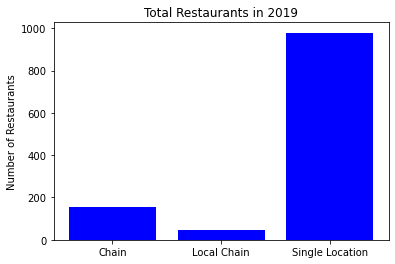

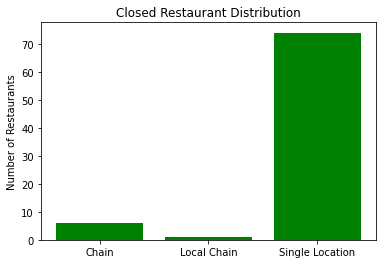

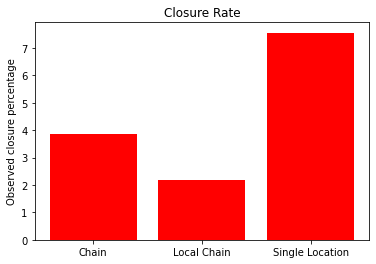

In [55]:
#Lists of values to be made into df
chain = ["Chain", closed_randb["Chain"].value_counts()[True], open_randb["Chain"].value_counts()[True], open_not_matched["Chain"].value_counts()[True]]
local_chain = ["Local Chain", closed_randb["Local Chain"].value_counts()[True], open_randb["Local Chain"].value_counts()[True], open_not_matched["Local Chain"].value_counts()[True]]
single_location = ["Single Location", closed_randb["Single Location"].value_counts()[True], open_randb["Single Location"].value_counts()[True], open_not_matched["Single Location"].value_counts()[True]]

#Creates a dataframe of these lists
chain_df = pd.DataFrame([chain, local_chain, single_location])
chain_df.columns = ["Type", "Closed", "Open", "Unknown"]
chain_df = chain_df.set_index("Type")
chain_df["Total in 2019"] = chain_df["Closed"] + chain_df["Open"] + chain_df["Unknown"]
chain_df["Closure Rate"] = chain_df["Closed"]/chain_df["Total in 2019"]
display(chain_df)

ax = plt.subplot(1,1,1)
total =ax.bar(["Chain", "Local Chain", "Single Location"], chain_df["Total in 2019"], color='b', align='center')
plt.ylabel('Number of Restaurants')
ax.set_title("Total Restaurants in 2019")
plt.show()

ax = plt.subplot(1,1,1)
total =ax.bar(["Chain", "Local Chain", "Single Location"], chain_df["Closed"], color='g', align='center')
plt.ylabel('Number of Restaurants')
ax.set_title("Closed Restaurant Distribution")
plt.show()

ax = plt.subplot(1,1,1)
total =ax.bar(["Chain", "Local Chain", "Single Location"], 100 * chain_df["Closure Rate"], color='r', align='center')
plt.ylabel('Observed closure percentage')
ax.set_title("Closure Rate")
plt.show()

As we can see, there are visually noticeable differences between the closure rates of our restaurants. Specifically, the closure rate for single locations is double that of chains and three times that of local chains.

Now, we want to use a chi-squared test to see if our results are statistically significant.

In [23]:
from scipy import stats

#Create a dictionary with our the number of closed restaurants in each category

percentage_closed = {True : (6/155, 155)} #Chain
percentage_closed_l = {True : (1/46, 46)} #Local chain
percentage_closed_s = {True : (74/979, 979)} #Single Location

#function that calculates Chi-squared critical values for each variable
def chi_square(dict):
   expected_percentage = 81/1180 #expected closure rate from our sample
   dic = {}
   for i in dict.keys():
       #the next line implements the chi-squared formula
       value = (dict[i][0]*dict[i][1] - expected_percentage*dict[i][1])**2/(expected_percentage*dict[i][1]) + ((1-dict[i][0])*dict[i][1] - (1- expected_percentage)*dict[i][1])**2/((1- expected_percentage)*dict[i][1])
       dic[i] = value
    
   return dic

print("Chain")
print(chi_square(percentage_closed))
print("We can be", str(100 * stats.chi2.cdf(chi_square(percentage_closed)[True], 1)) + " percent certain that chain restaurants performed better")
print("Local Chain")
print(chi_square(percentage_closed_l))
print("We can be", str(100 * stats.chi2.cdf(chi_square(percentage_closed_l)[True], 1)) + " percent certain that local chain restaurants performed better")
print("Single Location")
print(chi_square(percentage_closed_s))
print("We can be", str(100 * stats.chi2.cdf(chi_square(percentage_closed_s)[True], 1)) + " percent certain that single location restaurants performed worse")

Chain
{True: 2.172470248286973}
We can be 85.94996157492812 percent certain that chain restaurants performed better
Local Chain
{True: 1.5829830173040729}
We can be 79.1668463334101 percent certain that local chain restaurants performed better
Single Location
{True: 0.7382298973462892}
We can be 60.97715042443075 percent certain that single location restaurants performed worse


Since we have one degree of freedom (open vs closed), we need a value of 3.84 to reject our null hypothesis at 95% certainty. While we were unable to get this high of a degree of certainty for any of our variables, we can say with 86% certainty that chain resataurants performed better and we can say with 79% certainty that local chain resataurants performed better. While this isn't quite good enough for scientific papers, we might be able to confirm our hypothesis with better data.

### Closure Location Analysis

In [24]:
!pip install folium

We will use folium to help us visualize our data. Here we make lists of our three dataframes in the format folium can use them.

In [25]:
import folium
from folium.plugins import FastMarkerCluster, HeatMap

nola = [29.951065, -90.071533 ]

locations = open_randb[['Latitude', 'Longitude']].dropna()
locationlistopen = locations.values.tolist()

locations = closed_randb[['Latitude', 'Longitude']].dropna()
locationlistclosed = locations.values.tolist()

locations = open_not_matched[['Latitude', 'Longitude']].dropna()
locationsopen_unconfirmed = locations.values.tolist()

First we're just going to plot a map of every restaurant in our dataframe and label their color accordingly. Restaurants we have confirmed are open are in dark green, restaurants we believe to be open are in light green and closed restaurants are in red.

In [26]:
m = folium.Map(location=nola,
               zoom_start=11,
               tiles='openstreetmap')

for x in locationlistopen:
    folium.Marker([x[0], x[1]], icon=folium.Icon(color='green', icon='cutlery', prefix='fa')).add_to(m)
for x in locationlistclosed:
    folium.Marker([x[0], x[1]], icon=folium.Icon(color='red', icon='cutlery', prefix='fa')).add_to(m)
    
for x in locationsopen_unconfirmed:
    folium.Marker([x[0], x[1]], icon=folium.Icon(color='lightgreen', icon='cutlery', prefix='fa')).add_to(m)
    
m

As you can see that's not very useful. Instead we'll make a heat map of the open restaurants.

In [27]:
m2 = folium.Map(location=nola,
               zoom_start=11,
               tiles='openstreetmap')
allopen = np.concatenate([np.array(locationlistopen), np.array(locationsopen_unconfirmed)])
m2.add_child(HeatMap(allopen))

Comparing open to closed you can see some hotspots are similar. North and East of Kenner there are large concentrations of both open and closed restaurants. This makes sense that there will be more closed restaurants in areas with more restaurants overall. It is hard to tell from this map if there are are any true "hot spots" for closed restaurants, so we will instead have to sort by zip code and determine if any closing rates are statistically significant.

In [28]:
m3 = folium.Map(location=nola,
               zoom_start=11,
               tiles='openstreetmap')


m3.add_child(HeatMap(locationlistclosed))

Here we make a dictionary of every zip code contained in the three dataframes, deleting the 0's which are restaurants that we don't know their zip code. The value of each zip code is a tuple of the percentage of restaurants that closed this year and the total number of restaurants in that zip code, open or closed.

In [29]:
#convert the zip codes into stings
closed_randb['Zip'] = closed_randb['Zip'].apply(lambda x: str(x))
open_randb['Zip'] = open_randb['Zip'].apply(lambda x: str(x))
open_not_matched['Zip'] = open_not_matched['Zip'].apply(lambda x: str(x))

#drop the values where there are no zipcodes entered
c = closed_randb['Zip'].value_counts().drop('0')
o1 = open_randb['Zip'].value_counts()
o2 = open_not_matched['Zip'].value_counts().drop('0')

#concatenate the above into one dictionary
df = pd.concat([closed_randb, open_randb, open_not_matched])
total = dict(df['Zip'].value_counts())
del total['0']

#concatenate the closed restaurant into one dictionary
closed = dict(c)
percentage_closed = {}

#create a dictionary in the form (zip : (closure rate, total open))
for i in total:
    if i in closed.keys() and total[i] >= 40: #we cant analyze zip codes with under 40 as our test does not work with low data totals
        percentage_closed[i] = (closed[i] / total[i]), total[i]
percentage_closed

#performs a chi squared on each zip code
def chi_square(dict):
   expected_percentage = 81/1180 #expected closure rate
   dic = {}
   for i in dict.keys():
       #calculates chi-squared value
       value = (dict[i][0]*dict[i][1] - expected_percentage*dict[i][1])**2/(expected_percentage*dict[i][1]) + ((1-dict[i][0])*dict[i][1] - (1- expected_percentage)*dict[i][1])**2/((1- expected_percentage)*dict[i][1])
       #adds chi-squared and p value to the dictionary
       dic[i] = [value, str(100 * stats.chi2.cdf(value, 1))]
    
   return dic

print("The average closure rate in the sample was", str(81/1180))
display(percentage_closed)
chi_square(percentage_closed)

The average closure rate in the sample was 0.06864406779661017


{'70130': (0.038461538461538464, 130),
 '70115': (0.060240963855421686, 83),
 '70116': (0.025974025974025976, 77),
 '70119': (0.029411764705882353, 68),
 '70118': (0.09523809523809523, 63),
 '70002': (0.06557377049180328, 61),
 '70062': (0.16071428571428573, 56),
 '70001': (0.05660377358490566, 53),
 '70117': (0.11538461538461539, 52),
 '70065': (0.12, 50),
 '70122': (0.023255813953488372, 43),
 '70006': (0.175, 40)}

{'70130': [1.8524048884983066, '82.64960495361635'],
 '70115': [0.09167245600878211, '23.793835533458367'],
 '70116': [2.192896657258198, '86.13516449372109'],
 '70119': [1.6371098569175253, '79.92775310967207'],
 '70118': [0.6969314736982314, '59.61833115572769'],
 '70002': [0.008994395928369724, '7.555712357863098'],
 '70062': [7.425191732744052, '99.35683028373727'],
 '70001': [0.1201797708227225, '27.116040465557674'],
 '70117': [1.7769378533709748, '81.7474209592558'],
 '70065': [2.062683247396623, '84.90558293431319'],
 '70122': [1.3855962811179319, '76.0849807658125'],
 '70006': [7.07725317067143, '99.21931408503785']}

As you can see, we have two zip codes that are statistically significant: 70006 and 70062.

We were unable to find any comparable statistics of yearly closure rates. All the data talks about failure relative to the businesses years of operation, not just all in one given year.

Here we map out the closed restaurants in 70062 and 70006. We can see they are in Kenner and Metairie respectively.

In [30]:
m5 = folium.Map(location=nola,
               zoom_start=11,
               tiles='openstreetmap')

locations = closed_randb[(closed_randb['Zip'] == '70062') | (closed_randb['Zip'] == '70006')][['Latitude', 'Longitude']].dropna()
locationlistclosed = locations.values.tolist()

for x in locationlistclosed:
    folium.Marker([x[0], x[1]], icon=folium.Icon(color='red', icon='cutlery', prefix='fa')).add_to(m5)

m5

This is the list of restaurants that closed this year in Kenner. After having searched through all of them we have confirmed none of them were in the airport and closed as a result of the new terminal. Almost all the restaurants were within a few blocks of the airport and a few were right next to all the hotels that are around the airport. While we can't say for certain, it is definitely possible this area has been hit harder as a result of the decrease in travel.

In [31]:
closed_randb[closed_randb['Zip'] == '70062']

,index,PhoneNumber,BusinessName,Address,Latitude,Longitude,location,point,Zip,Chain,Chain name,Local Chain,Local Chain name,Single Location
4,135,466-2066,rootbeers sports tavern,2001 georgia av kenner,29.992346,-90.240693,"(2001, Georgia Avenue, Rex Trailer Court, Kenn...","(29.992346, -90.240693, 0.0)",70062,False,None,False,None,True
12,1011,470-2394,ted’s treats & eats,940 veterans memorial blvd kenner,30.006205,-90.255405,"(940, Veterans Memorial Boulevard, Rex Trailer...","(30.006204597560977, -90.25540470731708, 0.0)",70062,False,None,False,None,True
35,716,305-0986,pupuseria lila’s and rest,2714 roosevelt blvd kenner,30.004625,-90.232694,"(2714, Roosevelt Boulevard, Rex Trailer Court,...","(30.004625142857144, -90.23269428571429, 0.0)",70062,False,None,False,None,True
39,588,309-5231,legacy kitchen restaurant,759 veterans memorial blvd metairie,30.003730,-90.159382,"(Veterans Memorial Boulevard, Metairie, Jeffer...","(30.0037299, -90.1593819, 0.0)",70062,False,None,False,None,True
58,351,934-4900,heritage grill,111 veterans memorial blvd metairie,30.003730,-90.159382,"(Veterans Memorial Boulevard, Metairie, Jeffer...","(30.0037299, -90.1593819, 0.0)",70062,False,None,False,None,True
62,301,467-9928,fong’s chinese & cantonese restaurant,2101 williams blvd kenner,29.994199,-90.241387,"(2101, Williams Boulevard, Rex Trailer Court, ...","(29.99419857142857, -90.24138673469388, 0.0)",70062,False,None,False,None,True
64,284,305-1797,fatima restaurant,2424 williams blvd kenner,30.000186,-90.240875,"(2424, Williams Boulevard, Rex Trailer Court, ...","(30.000185877551022, -90.24087467346939, 0.0)",70062,False,None,False,None,True
73,96,468-2187,american pie diner,2244 veterans memorial blvd kenner,30.007009,-90.236176,"(Tavern on Vets, 2244, Veterans Memorial Boule...","(30.0070088, -90.2361758, 0.0)",70062,False,None,False,None,True
78,22,353-4227,bbq voodoo metairie,2742 phoenix st kenner,30.004491,-90.262198,"(2742, Phoenix Street, Rex Trailer Court, Kenn...","(30.004491285714288, -90.26219785714287, 0.0)",70062,False,None,False,None,True


### Local area of a restaurant
In the zipcode analysis, we were able to state some of the zipcodes that were hit the hardest. Now, we want to try to state some information about the specific local areas of closed and open restaurants. Specifically, did closed and open restaurants cluster together? Also, were restaurants near live events or short-term rental locations do better than those farther away. We hypothesize that open and closed restaurants will cluster as certain small regions were likely hit harder. Also, we believe that those close to live event venues and short term rentals will perform worse. This is because these two drive business into the restaurants around them. However, during lockdown periods, this potential revenue stream disapeared.

To start, we need a function that will calculate the number of restaurants, live event venues, or short-term rentals in the proximity of a given restaurant. Then, we can use this number to perform a logistic regression on the number of closed restaurants, open restaurants, live event venues, and short-term rentals. This will reveal if any of our variables are valuable.

In [ ]:
import geopy.distance

#takes a datframe x and finds the number of restaurants in dataframe df within a certain dist in miles
def n_close(x, dist, df, Location): 
    num = 0
    for i in range(df.shape[0]): #iterates through df
       if dist >= geopy.distance.distance(df[Location][i], x).miles:
          num += 1
    return num

Now we want to use the above function to calculate the number of live between live event venues and rentals within a half-mile radius.

In [34]:
#Use the above function to calculate the number of events and rentals near each restaurant in all of our dfs
closed_randb["Close Events"] = closed_randb["point"].apply(n_close, args =(0.5, event, "Location"))
closed_randb["Close Rentals"] = closed_randb["point"].apply(n_close, args =(0.5, rental,"Location"))

open_not_matched["Close Rentals"] = open_not_matched["point"].apply(n_close, args =(0.5, rental, "Location"))
open_not_matched["Close Events"] = open_not_matched["point"].apply(n_close, args =(0.5, event, "Location"))

open_copy = copy.deepcopy(open_randb)

#removes datapoints with no location data
open_copy = open_copy.loc[open_copy["Location"] != 0]

#Creates a tuple from the location data so geopandas can calculate the distance between restaurants
open_copy["Location"] =  open_copy["Location"].apply(lambda x:tuple(map(float, x[1:-1].split(', '))) )

#Now we can apply the above function
open_copy["Close Rentals"] = open_copy["Location"].apply(n_close, args =(0.5, rental, "Location"))
open_copy["Close Events"] = open_copy["Location"].apply(n_close, args =(0.5, event, "Location"))

In [41]:
display(closed_randb[["BusinessName", "Close Rentals", "Close Events"]].head())
display(open_not_matched[["BusinessName", "Close Rentals", "Close Events"]].head())
open_copy[["BusinessName", "Close Rentals", "Close Events"]].head()

,BusinessName,Close Rentals,Close Events
0,wherehouse bar and grill,0,0
1,turtle bay on burbon llc,126,57
2,shovel head,0,0
3,700 club,100,61
4,rootbeers sports tavern,0,0


,BusinessName,Close Rentals,Close Events
0,augies restaurant,0,0
1,auntie anne’s,62,10
2,avenue,10,0
3,burritos grill #2,0,0
4,baby’s snack box,55,4


,BusinessName,Close Rentals,Close Events
0,august moon,39,2
1,averys po boys,31,1
2,ba chi canteen,14,6
3,ba mien restaurant,1,0
4,barracuda,25,1


Now, we will use the same function to calculate the number of closed and open restaurants in the area of each restaurant. We decided to use a quarter mile instead of a half-mile as there are more restaurants per area than rentals and live event permits per area.

In [38]:
#reset the index of our dataframes
open_copy = open_copy.reset_index(drop=True)
open_not_matched = open_not_matched.reset_index(drop=True)
closed_randb = closed_randb.reset_index(drop=True)

#Use n_close to find the number of close restaurants
open_copy["Close Open Restaurants"] = open_copy["Location"].apply(n_close, args =(0.25, open_copy, "Location"))
closed_randb["Close Open Restaurants"] = closed_randb["point"].apply(n_close, args =(0.25, open_copy, "Location"))

open_copy["Close Closed Restaurants"] = open_copy["Location"].apply(n_close, args =(0.25, closed_randb, "point"))
closed_randb["Close Closed Restaurants"] = closed_randb["point"].apply(n_close, args =(0.25, closed_randb, "point"))

display(open_copy[["BusinessName", "Close Open Restaurants", "Close Closed Restaurants"]])
display(closed_randb[["BusinessName", "Close Open Restaurants", "Close Closed Restaurants"]])

,BusinessName,Close Open Restaurants,Close Closed Restaurants
0,august moon,3,0
1,averys po boys,2,0
2,ba chi canteen,12,2
3,ba mien restaurant,1,0
4,barracuda,2,0
...,...,...,...
384,three legged dog,24,5
385,three palms bar and grill,2,1
386,turtle bay,13,2
387,twelve mile limit,4,0


,BusinessName,Close Open Restaurants,Close Closed Restaurants
0,wherehouse bar and grill,0,1
1,turtle bay on burbon llc,36,5
2,shovel head,0,1
3,700 club,23,4
4,rootbeers sports tavern,0,2
...,...,...,...
76,china ruby,0,1
77,big cheezy the,0,3
78,bbq voodoo metairie,0,1
79,bar frances,4,1


Next, we want to get one dataframe to train our variables on. The dependent variables will be: Close Events, Close Rentals, Close Closed Restaurants, and Close Open Restaurants.

In [49]:
#Creates lists of values that will be used to make a dataframe
open1 = [True] * open_copy.shape[0] + [False] * closed_randb.shape[0]
events = open_copy["Close Events"].tolist() + closed_randb["Close Events"].tolist()
rental = open_copy["Close Rentals"].tolist() + closed_randb["Close Rentals"].tolist()
closed_rest = open_copy["Close Closed Restaurants"].tolist() + open_copy["Close Closed Restaurants"].tolist()
open_rest = open_copy["Close Open Restaurants"].tolist() + open_copy["Close Open Restaurants"].tolist()

#Creates the dataframe
sample = pd.DataFrame([open1, events, rental, closed_rest, open_rest]).T
sample.columns = ["Open", "Close Events", "Close Rentals", "Close Closed Restaurants", "Close Open Restaurants"]
#Remove entries with missing points
sample = sample.fillna(-1)
sample = sample.loc[sample["Open"] != -1]

#display the means of our variables and our DF
display(sample.loc[sample["Open"] == True].mean())
display(sample.loc[sample["Open"] == False].mean())

Open                         1.000000
Close Events                16.817481
Close Rentals               76.786632
Close Closed Restaurants     1.555270
Close Open Restaurants      12.557841
dtype: float64

Open                         0.000000
Close Events                 9.629630
Close Rentals               35.666667
Close Closed Restaurants     1.345679
Close Open Restaurants      11.209877
dtype: float64

## Machine Learning

Finally, we are ready to train our logistic regression model. To do so, we will use Scikit learn's logistic regression and 5 fold cross validation. If our hypothesis is correct, we will have an accurate model that weights number of closed restaurants, live events, and short term-rentals negatively. Number of open restaurants should have a positive weight. 

As we can see, the model was 83% accurate, but the dataset is very skewed. Because of this, the model simply predicted that every restaurant in the sample would stay open. Obviously, this is not a good model. As a result, we cannot conclusively confirm or deny our hypothesis.

0.8319148936170213


,0,1,2,3
0,Close Events,Close Rentals,Close Closed Restaurants,Close Open Restaurants
1,-0.0132076,0.0164835,-0.071061,-0.00608035


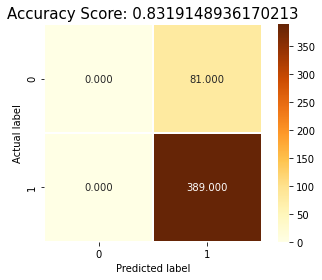

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import seaborn as sns

sample[0] = sample[0].apply(lambda x: int(x))

#Perform cross validation to test model accuracy
logisticRegr = LogisticRegression()
pipeline = Pipeline([("fit", logisticRegr)])
scores = cross_val_score(pipeline, sample[[1,2,3,4]], sample[0], cv=5, scoring="neg_mean_squared_error")
print(1 + scores.mean())

#Display the weight vector
logisticRegr.fit(sample[[1,2,3,4]], sample[0])
weight = pd.DataFrame([["Close Events", "Close Rentals", "Close Closed Restaurants", "Close Open Restaurants"], logisticRegr.coef_[0].tolist()])
display(weight)
predictions = logisticRegr.predict(sample[[1,2,3,4]])

cm = metrics.confusion_matrix(sample[0], predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrBr');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(1 + scores.mean())
plt.title(all_sample_title, size = 15);

As we can see, the model was 83% accurate, but the dataset is very skewed. Because of this, the model simply predicted that every restaurant in the sample would stay open. Obviously, this is not a good model. As a result, we cannot conclusively confirm or deny our hypothesis.

## Insight and Policy Decision

### Disclaimer

We can draw some conclusions and use the numbers we have to try and answer our questions but we have to keep in mind that our numbers are not necessarily representative of the truth, just of the bars and restaurants included in the 2019 Yellow Pages. We also only have the name and address of the closed restaurants, so we are unable to conduct more analysis such as the age distribution of the restaurants that closed. Of what we can answer, here is what we think:

### What areas of the city were hit the hardest? Why?

From our analysis we found 13 zip codes where the closure rate of restaurants was higher than the city average (6.86%). However, after testing for statistical significance only 70006 (Metairie, LA) and 70062 (Kenner, LA) remained.

We had hypothesized that areas with unemployment well above average would have higher closure rates than normal, and also areas that are predominantly African-American since they have been disproportionately affected by not only contracting COVID, but job losses as well.

When we look at our statistically significant zip codes demographic data we can see that none of our hypotheses came to fruition in a provable manner. Neither area had a higher unemployment rate than the city and were about 3.5% lower than the average in New Orleans. Demographically neither was a majority African-American and income wise 70062 has a median household income about 9k dollars below the city average while Metairie's is about 10k dollars over the city average. 

For these reasons our data seems to have proved our hypothesis wrong, however, we are working with incomplete information so we cannot make any definitive statements about why. We do think in Kenner it is very possible reduced airport travel has led to more restaurant closures. All of the restaurants in that area were right near the airport and its surrounding area. With the pandemic greatly reducing travel it is certainly possible that played a role in a high restaurant closure rate for the area, although we are not certain.

### Did closed and open restaurants cluster together in areas smaller than zipcode?

When we trained our logistic model, we were unable to conclude anything about the closure rate of these restaurants. If we look at our model, we see that we simply did not have enough data points to train a model on our skewed dataset. As a result the model simply assumed that all restaurants would stay open irregardless of the features. Due to this, we cannot make any conclusions. However, our model does suggest being near another restaurant also had a negative effect whether it was open or closed. 

### Did restaurants in close proximity to live events or short term rentals have an effect on restaurant closures?

Similar to the last question, we cannot make real conclusions as our logistic regression model wasn't given a sufficient amount of data.

However, our model suggests being near a short term rental location had a positive impact on a restaurant while being close to a live event venue had a negative effect. Even though we can't make this conclusion for certain, this model does disagree with our hypothesis, as we expected both to have a negative effect.

### Did chain restaurants outperform non-chains?

When we performed our exploratory analysis, we see that single location restaurants close at double the rate of national chains. However, when we performed our chi-squared analysis, we see we can only be 86% certain about this statement. While this is insufficient for publishing in a scientific journal, it shows that this is an area of interest. If a similar analysis was done on a dataset with more entries, we might be able to confirm our hypothesis.